In [484]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data


In [497]:
start = '2000-01-01'
end = '2022-11-01'

df = data.DataReader('TSLA','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,1.666667,1.169333,1.266667,1.592667,281494500.0,1.592667
2010-06-30,2.028000,1.553333,1.719333,1.588667,257806500.0,1.588667
2010-07-01,1.728000,1.351333,1.666667,1.464000,123282000.0,1.464000
2010-07-02,1.540000,1.247333,1.533333,1.280000,77097000.0,1.280000
2010-07-06,1.333333,1.055333,1.333333,1.074000,103003500.0,1.074000


In [498]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-10-26,230.600006,218.199997,219.399994,224.639999,85012500.0,224.639999
2022-10-27,233.809998,222.850006,229.770004,225.089996,61638800.0,225.089996
2022-10-28,228.860001,216.350006,225.399994,228.520004,69152400.0,228.520004
2022-10-31,229.850006,221.940002,226.190002,227.539993,61554300.0,227.539993
2022-11-01,237.399994,227.279999,234.050003,227.820007,62688800.0,227.820007


In [499]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-06-29,1.666667,1.169333,1.266667,1.592667,281494500.0,1.592667
1,2010-06-30,2.028000,1.553333,1.719333,1.588667,257806500.0,1.588667
2,2010-07-01,1.728000,1.351333,1.666667,1.464000,123282000.0,1.464000
3,2010-07-02,1.540000,1.247333,1.533333,1.280000,77097000.0,1.280000
4,2010-07-06,1.333333,1.055333,1.333333,1.074000,103003500.0,1.074000


In [500]:
df.rename(columns = {"Date" : "date", "Open" : "open", "High" : "high", "Low" : "low","Close" : "close", "Volume" : "volume", "Adj Close" : "adj close"}, inplace = True)
#renaming the data frame columns to lower case

In [501]:
df.columns

Index(['date', 'high', 'low', 'open', 'close', 'volume', 'adj close'], dtype='object')

In [377]:
df = df.drop(['date','adj close'], axis =1)

In [502]:
df.head()

,date,high,low,open,close,volume,adj close
0,2010-06-29,1.666667,1.169333,1.266667,1.592667,281494500.0,1.592667
1,2010-06-30,2.028000,1.553333,1.719333,1.588667,257806500.0,1.588667
2,2010-07-01,1.728000,1.351333,1.666667,1.464000,123282000.0,1.464000
3,2010-07-02,1.540000,1.247333,1.533333,1.280000,77097000.0,1.280000
4,2010-07-06,1.333333,1.055333,1.333333,1.074000,103003500.0,1.074000


In [503]:
df.shape

(3109, 7)

In [504]:
data_training = pd.DataFrame(df['close'][0:int(len(df)*0.80)])
data_testing = pd.DataFrame(df['close'][int(len(df)*0.80): int(len(df))])

In [505]:
print(data_training.shape)
print(data_testing.shape)

(2487, 1)
(622, 1)


In [382]:
data_training.head()

,close
0,1.592667
1,1.588667
2,1.464000
3,1.280000
4,1.074000


In [383]:
data_testing.head()

,close
2487,53.278000
2488,54.242001
2489,53.867332
2490,54.370667
2491,55.173332


In [384]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [385]:
data_training_array = scaler.fit_transform(data_training) 

In [462]:
data_testing.shape

(622, 1)

In [443]:
data_training_array.shape

(2487, 1)

In [387]:
x_train =[]
y_train =[]

In [388]:
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train
y_train

[0.015627436362738275,
 0.01684745744573515,
 0.01952042855752824,
 0.02081809394462603,
 0.021816296257853533,
 0.02164992920564895,
 0.02055190586779802,
 0.021661011616155103,
 0.020574082588320535,
 0.018355859192096157,
 0.017402010319913692,
 0.016093266488813148,
 0.017479654624014605,
 0.018378035912618673,
 0.018023125087686994,
 0.017435281350452563,
 0.016359454565641165,
 0.01411903461637726,
 0.015305782685583563,
 0.016647815396488286,
 0.017257835854245233,
 0.017634923399699427,
 0.01825603816747273,
 0.018666400709969205,
 0.015849255132507647,
 0.010813868309556413,
 0.011767717181738881,
 0.013231749621041254,
 0.011867538206362313,
 0.012011712672030772,
 0.012000632244776318,
 0.01205608197908941,
 0.012233545324562056,
 0.013398116673245839,
 0.013797396805236155,
 0.014030311868273592,
 0.012377719790230515,
 0.012377719790230515,
 0.011556980822475662,
 0.011035702945339395,
 0.010913687350928142,
 0.009128019083736363,
 0.0075641676030622634,
 0.008029995745885

In [389]:
x_train, ytrain = np.array(x_train), np.array(y_train)

In [390]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LSTM

In [550]:
m_2 = Sequential()
m_2.add(LSTM(units = 50,activation='relu',return_sequences =True,
              input_shape=(x_train.shape[1],1)))
m_2.add(Dropout(0.2))


m_2.add(LSTM(units = 60,activation='relu',return_sequences =True))
m_2.add(Dropout(0.3))


m_2.add(LSTM(units = 80,activation='relu',return_sequences =True))
m_2.add(Dropout(0.4))


m_2.add(LSTM(units = 120,activation='relu',return_sequences =False))
m_2.add(Dropout(0.5))

m_2.add(Dense(units = 1))

In [551]:
m_2.compile(optimizer='adam',loss='mean_squared_error')
m_2.fit(x_train,ytrain, epochs=2)
print(m_2.summary())

Epoch 1/2
75/75 [==============================] - 23s 235ms/step - loss: 0.0129
Epoch 2/2
75/75 [==============================] - 18s 237ms/step - loss: 0.0043
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_54 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_34 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_55 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_35 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_56 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_36 (Dropout)  

In [554]:
m_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [569]:
m_2.save('keras_model_SDAI.h5')

In [571]:
# converting categorical variables in y_train to numerical variables
y_train_dummies = pd.get_dummies(y_train).values
print('Shape of Label tensor: ', y_train_dummies.shape)

Shape of Label tensor:  (2387, 2217)


In [572]:
y_test_dummies = pd.get_dummies(y_test).values
print('Shape of Label tensor: ', y_test_dummies.shape)

Shape of Label tensor:  (622, 620)


In [563]:
m_2.fit(x_train, y_train_dummies, epochs=5, batch_size=32)

Epoch 1/5
75/75 [==============================] - 19s 209ms/step - loss: 0.0034
Epoch 2/5
75/75 [==============================] - 16s 216ms/step - loss: 5.4086e-04
Epoch 3/5
75/75 [==============================] - 16s 214ms/step - loss: 5.0081e-04
Epoch 4/5
75/75 [==============================] - 17s 224ms/step - loss: 4.7868e-04
Epoch 5/5
75/75 [==============================] - 17s 221ms/step - loss: 4.6733e-04


In [ ]:
m_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

m_2.save('keras_model_SDAI.h5')

# converting categorical variables in y_train to numerical variables
y_train_dummies = pd.get_dummies(y_train).values
print('Shape of Label tensor: ', y_train_dummies.shape)

y_test_dummies = pd.get_dummies(y_test).values
print('Shape of Label tensor: ', y_test_dummies.shape)

m_2.fit(x_train, y_train_dummies, epochs=5, batch_size=32)

In [394]:
data_testing.head()

,close
2487,53.278000
2488,54.242001
2489,53.867332
2490,54.370667
2491,55.173332


In [395]:
past_100_days = data_training.tail(100)

In [396]:
final_df = past_100_days.append(data_testing,ignore_index=True)

In [397]:
final_df.head()

,close
0,27.039333
1,27.948000
2,28.350000
3,28.729334
4,28.691999


In [398]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00766542],
       [0.01002016],
       [0.01106191],
       [0.01204493],
       [0.01194818],
       [0.00923928],
       [0.0098664 ],
       [0.01192745],
       [0.01413016],
       [0.01560381],
       [0.01863059],
       [0.02261792],
       [0.0207521 ],
       [0.02020099],
       [0.02827067],
       [0.03052694],
       [0.02717191],
       [0.02630638],
       [0.02578982],
       [0.03213016],
       [0.03599312],
       [0.0364492 ],
       [0.03517422],
       [0.03399944],
       [0.03553356],
       [0.03796777],
       [0.04830237],
       [0.04998851],
       [0.07234902],
       [0.09084485],
       [0.06452293],
       [0.06698651],
       [0.06683275],
       [0.07084254],
       [0.0713781 ],
       [0.07015323],
       [0.07649529],
       [0.07580943],
       [0.08589351],
       [0.09608989],
       [0.09297846],
       [0.09325315],
       [0.08164185],
       [0.07578869],
       [0.0721417 ],
       [0.05490012],
       [0.05299801],
       [0.066

In [399]:
input_data.shape

(722, 1)

In [400]:
x_test =[]
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [401]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(622, 100, 1)
(622,)


In [402]:
y_predicted = model.predict(x_test)

20/20 [==============================] - 2s 74ms/step


In [403]:
y_predicted.shape

(622, 1)

In [405]:
y_test.shape

(622,)

In [419]:
sc = scaler.scale_

In [420]:
scale_factor = 1/sc[0]

In [421]:
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

In [421]:
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

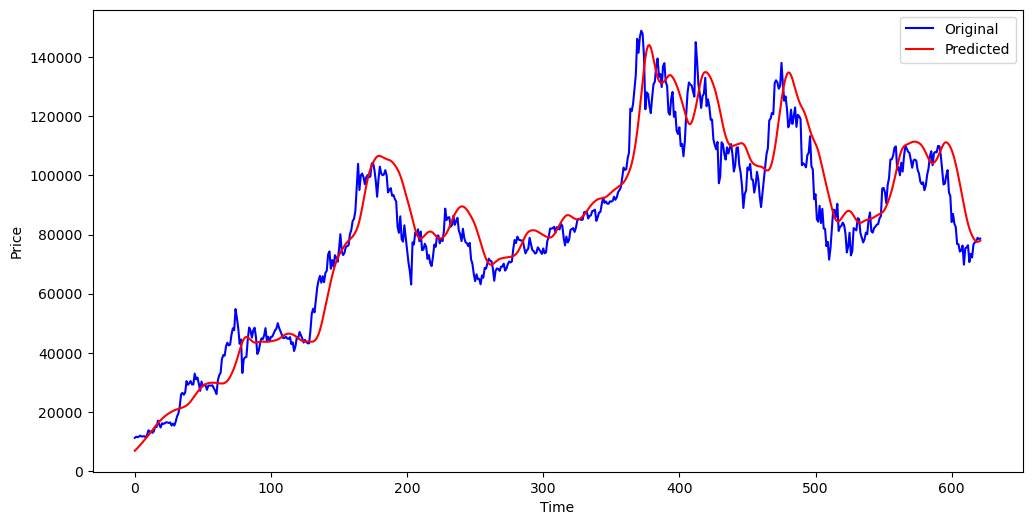

In [422]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label = 'Original')
plt.plot(y_predicted,'r', label = 'Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [423]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions[0:10]

20/20 [==============================] - 2s 76ms/step


array([[41.99645 ],
       [43.150562],
       [44.37324 ],
       [45.666782],
       [47.011932],
       [48.394276],
       [49.807453],
       [51.24021 ],
       [52.68643 ],
       [54.136623]], dtype=float32)

In [424]:
predictions.shape

(622, 1)

In [425]:
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE score of the model:", rmse)

RMSE score of the model: 86065.99949882472


In [426]:
x_train.shape

(2387, 100, 1)

In [427]:
ytrain.shape

(2387,)

In [428]:
data = df.filter(['close'])
data

,close
0,1.592667
1,1.588667
2,1.464000
3,1.280000
4,1.074000
...,...
3104,224.639999
3105,225.089996
3106,228.520004
3107,227.539993


In [429]:
dataset = data.values

In [430]:
training_data_len = int(np.ceil( len(dataset) * .80 ))-1
print("Training data length: ", training_data_len)

Training data length:  2487


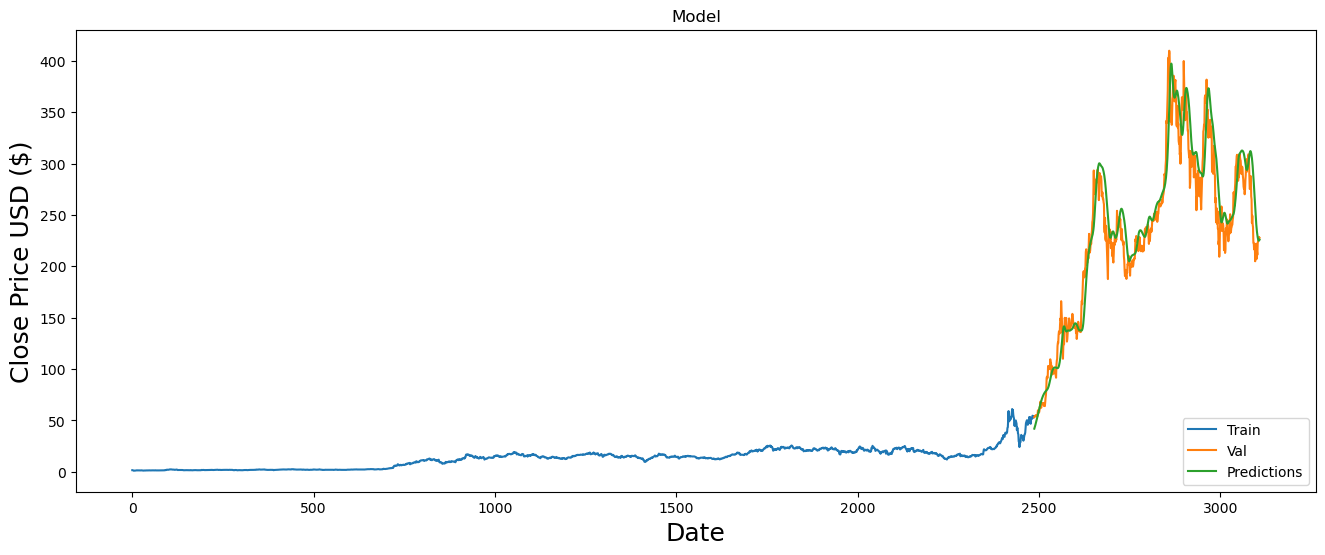

In [431]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()